# Animal Movement Analysis with MixedWalker

## 1. Setup & Imports

This notebook demonstrates the use of the `MixedWalker` class to generate animal movement paths using Movebank data. The implementation supports optional GPU acceleration through CUDA backend for improved performance.

### Overview

In this initial setup phase, we will:

- **List available studies** from the resources directory
- **Define custom animal behaviors** for specific landscape features
- **Configure study parameters** for movement analysis

### Study Configuration

You can work with:

- **Pre-loaded studies** from the resources folder
- **Custom studies** by providing the path to a folder containing your `animal_data.csv` file

### Output Management

The analysis process generates and organizes:

- **Fetched landcover data**
- **Serialized movement data**
- **JSON trajectory files**
- **Interactive Leaflet HTML maps** displaying generated random walks between actual Movebank observations

In [1]:
from random_walk_package.bindings.data_structures.kernel_terrain_mapping import set_landmark_mapping, \
    set_forbidden_landmark
from random_walk_package.core.MixedWalker import *

studies = ["elephant_study/", "baboon_SA_study/", "leap_of_the_cat/", "Boars_Austria/", "Cranes Kazakhstan/"]

study = studies[2]
kernel_mapping = create_mixed_kernel_parameters(animal_type=MEDIUM, base_step_size=5)
set_landmark_mapping(kernel_mapping, GRASSLAND, is_brownian=False, step_size=5, directions=6, diffusity=1)
set_landmark_mapping(kernel_mapping, TREE_COVER, is_brownian=True,
                     step_size=5,
                     directions=1,
                     diffusity=2.6)
set_forbidden_landmark(kernel_mapping, WATER);

<xml><var name="_dummy_ipython_val"  />
<var name="_dummy_special_var"  />
<var name="AIRBORNE" type="int" qualifier="builtins" value="0" />
<var name="AMPHIBIAN" type="int" qualifier="builtins" value="1" />
<var name="Array" type="PyCArrayType" qualifier="_ctypes" value="%3Cclass %27_ctypes.Array%27&gt;" isContainer="True" />
<var name="BUILT_UP" type="int" qualifier="builtins" value="50" />
<var name="BigEndianStructure" type="_swapped_struct_meta" qualifier="ctypes._endian" value="%3Cclass %27ctypes._endian.BigEndianStructure%27&gt;" isContainer="True" />
<var name="BigEndianUnion" type="_swapped_union_meta" qualifier="ctypes._endian" value="%3Cclass %27ctypes._endian.BigEndianUnion%27&gt;" isContainer="True" />
<var name="CROPLAND" type="int" qualifier="builtins" value="40" />
<var name="CUDA_AVAILABLE" type="bool" qualifier="builtins" value="True" />
<var name="Cache" type="PyCStructType" qualifier="_ctypes" value="%3Cclass %27random_walk_package.bindings.data_structures.types.Cac

In [5]:
walker = MixedWalker(resolution=300, kernel_mapping=kernel_mapping, study_folder=study)
walk_path = walker.generate_movebank_walks(serialized=False)
import webbrowser

webbrowser.open(f'file://{walk_path}')

KeyboardInterrupt: 

# Generate a custom terrain-based walk
> **Note:**
> When a terrain and its corresponding kernel mapping are passed to the `Walker` object, the walker takes ownership of their allocated memory.
> This means that once the walker goes out of scope, the terrain object is automatically freed on the C side.
> This behavior is intentional and ensures that Python users do not need to perform manual memory management.

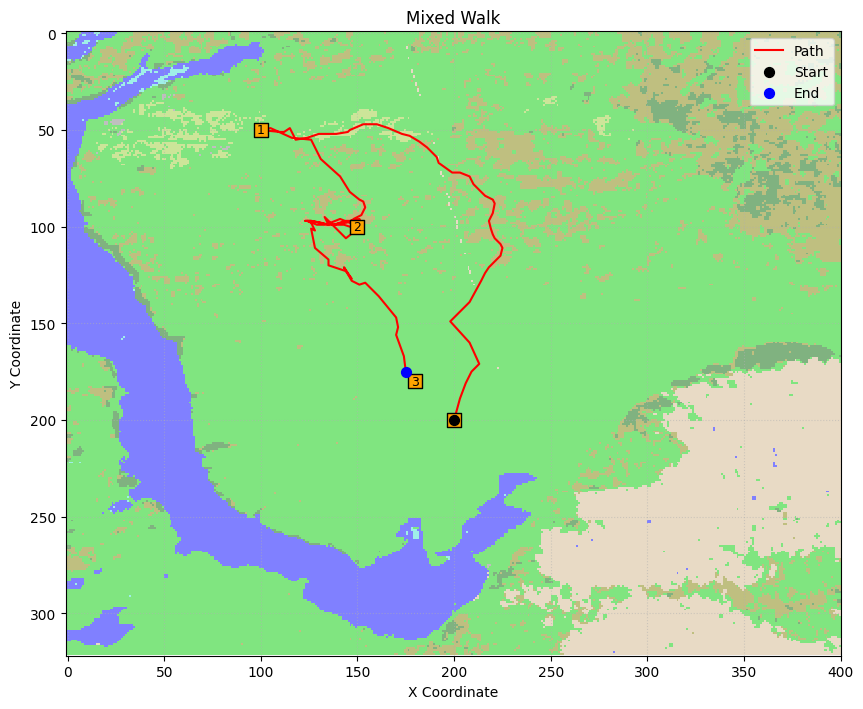

In [2]:
# Create a synthetic terrain (e.g. 20x20 grid)
terrain = create_terrain_map('terrain_baboons.txt', delim=' ')
# Define movement steps as grid coordinates
steps = [(200, 200), (100, 50), (150, 100), (180, 180)]
# Choose kernel mapping (or create custom mapping)
kernel_mapping = create_mixed_kernel_parameters(animal_type=LIGHT, base_step_size=11)
# Generate and visualize the walk
walk = MixedWalker.generate_custom_walks(
    terrain=terrain,
    steps=steps,
    T=50,
    kernel_mapping=kernel_mapping,
    plot=True,
    plot_title="Custom Terrain Walk"
)